In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
print(train_data.shape)
train_data.head(10)

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [7]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [8]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.489021,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_data[train_data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


<AxesSubplot:>

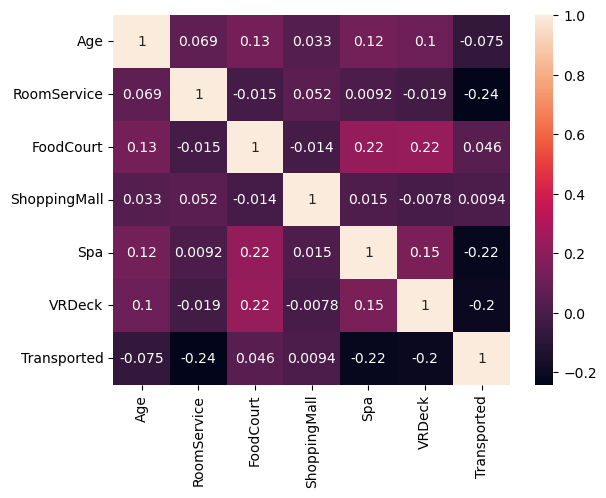

In [10]:
# plt.figure(figsize=(12,12))
sns.heatmap(data=train_data.corr(), annot=True)

In [11]:
train_data[train_data['Age'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,0.0,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,False
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Alchib Myling,True
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,False
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Maen Fowlesterez,True


In [12]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<BarContainer object of 3 artists>

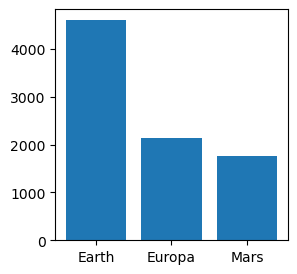

In [13]:
plt.figure(figsize=(3,3))
# fig, ax = plt.subplots(figsize=(3,4))
plt.bar(train_data['HomePlanet'].value_counts().index, train_data['HomePlanet'].value_counts().values)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

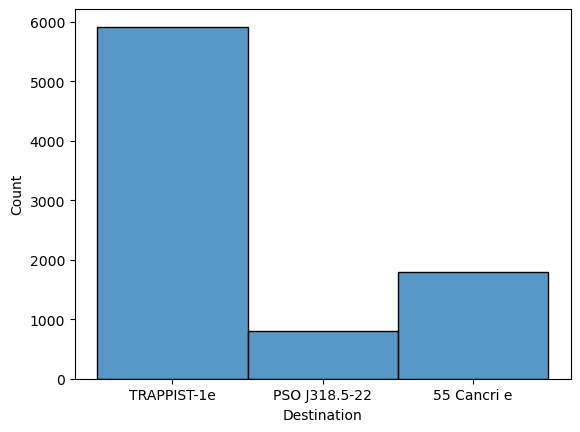

In [14]:
# sns.set_style(rc=)
sns.histplot(data=train_data, x='Destination')
# plt.show()

In [15]:
le = LabelEncoder()
train_data['HomePlanetCode'] = le.fit_transform(train_data['HomePlanet'])
train_data['DestinationCode'] = le.fit_transform(train_data['Destination'])
test_data['HomePlanetCode'] = le.fit_transform(test_data['HomePlanet'])
test_data['DestinationCode'] = le.fit_transform(test_data['Destination'])

In [16]:
train_data['HomePlanetCode'].value_counts()

0    4602
1    2131
2    1759
3     201
Name: HomePlanetCode, dtype: int64

In [17]:
train_data['DestinationCode'].value_counts()

2    5915
0    1800
1     796
3     182
Name: DestinationCode, dtype: int64

In [18]:
train_data[train_data['HomePlanet'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported
59,NaN,TRAPPIST-1e,True
113,NaN,TRAPPIST-1e,False
186,NaN,55 Cancri e,True
225,NaN,TRAPPIST-1e,False
234,NaN,55 Cancri e,True
...,...,...,...
8515,NaN,TRAPPIST-1e,False
8613,NaN,55 Cancri e,False
8666,NaN,55 Cancri e,True
8674,NaN,TRAPPIST-1e,False


In [19]:
train_data[train_data['Destination'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported
47,Mars,NaN,True
128,Earth,NaN,False
139,Earth,NaN,False
347,NaN,NaN,False
430,Earth,NaN,False
...,...,...,...
8372,Earth,NaN,True
8551,Mars,NaN,True
8616,Mars,NaN,True
8621,Europa,NaN,False


In [20]:
train_data['CryoSleepCode'] = le.fit_transform(train_data['CryoSleep'])
test_data['CryoSleepCode'] = le.fit_transform(test_data['CryoSleep'])

In [21]:
test_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanetCode,DestinationCode,CryoSleepCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,2,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,2,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,2,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,2,0
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,0,2,0
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,1,0,1
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,1,2,1
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,1,0,1
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,0,0,0


In [22]:
train_data[['CabinDeck','CabinNum','CabinSide']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['CabinDeck','CabinNum','CabinSide']] = test_data['Cabin'].str.split('/', expand=True)

In [23]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,2,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,2,0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,2,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,2,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,2,0,F,1,S


In [24]:
train_data[train_data.CabinDeck.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0,2,0,NaN,NaN,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,2,2,1,NaN,NaN,NaN
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,1,2,0,NaN,NaN,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,2,2,0,NaN,NaN,NaN
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,2,2,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,0.0,Naosura Motled,False,1,0,0,NaN,NaN,NaN
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False,1,0,0,NaN,NaN,NaN
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True,1,0,1,NaN,NaN,NaN
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,0,2,1,NaN,NaN,NaN


In [25]:
train_data['CabinDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [26]:
# train_data['CabinDeckCode'] = le.fit_transform(train_data['CabinDeck'])
# test_data['CabinDeckCode'] = le.fit_transform(test_data['CabinDeck'])

train_CabinDeck_encoded = pd.get_dummies(train_data['CabinDeck'], prefix='CabinDeck')
test_CabinDeck_encoded = pd.get_dummies(test_data['CabinDeck'], prefix='CabinDeck')

train_CabinDeck_encoded
# train_data['CabinDeckCode'].value_counts()

,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,1,0
8690,0,0,0,0,0,0,1,0
8691,0,0,0,0,1,0,0,0


In [27]:
train_data['CabinSideCode'] = le.fit_transform(train_data['CabinSide'])
test_data['CabinSideCode'] = le.fit_transform(test_data['CabinSide'])
train_data['CabinSideCode'].value_counts()

1    4288
0    4206
2     199
Name: CabinSideCode, dtype: int64

In [28]:
train_data['TransportedCode'] = le.fit_transform(train_data['Transported'])
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide,CabinSideCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,2,1,G,3,S,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,2,0,F,4,S,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,1,C,0,S,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,2,0,C,1,S,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,2,0,F,5,S,1


In [29]:
train_data['VIPCode'] = le.fit_transform(train_data['VIP'])
test_data['VIPCode'] = le.fit_transform(test_data['VIP'])
train_data['VIPCode'].value_counts()

0    8291
2     203
1     199
Name: VIPCode, dtype: int64

In [30]:
train_data.Age.fillna(train_data.Age.mean(), inplace=True)
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
train_data.Age.isna().sum()
test_data.Age.isna().sum()

0

<AxesSubplot:>

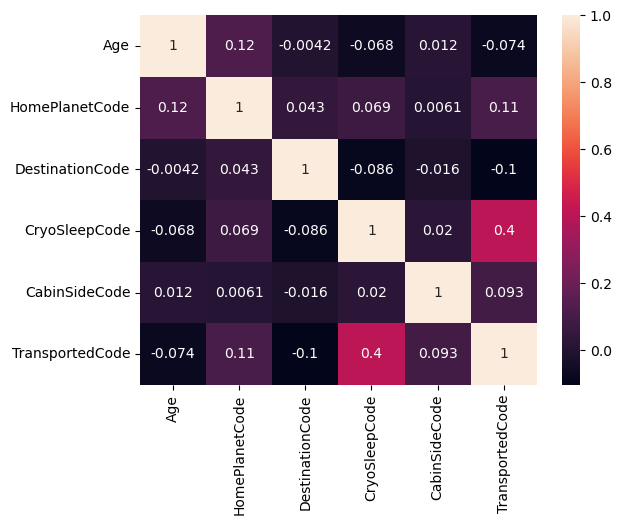

In [31]:
sns.heatmap(data=train_data[['Age','HomePlanetCode','DestinationCode','CryoSleepCode','CabinSideCode','TransportedCode']].corr(), annot=True)

<AxesSubplot:>

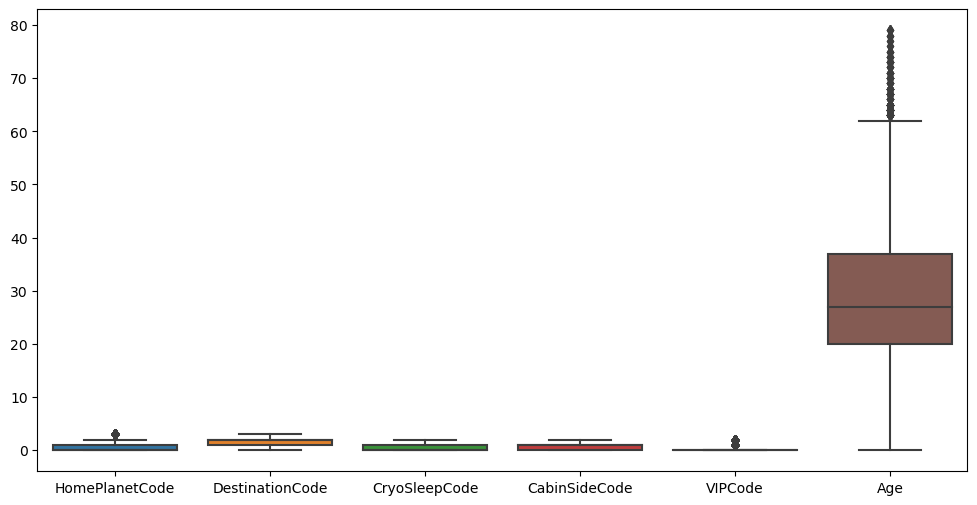

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data[['HomePlanetCode','DestinationCode','CryoSleepCode','CabinSideCode','VIPCode','Age']])

<AxesSubplot:>

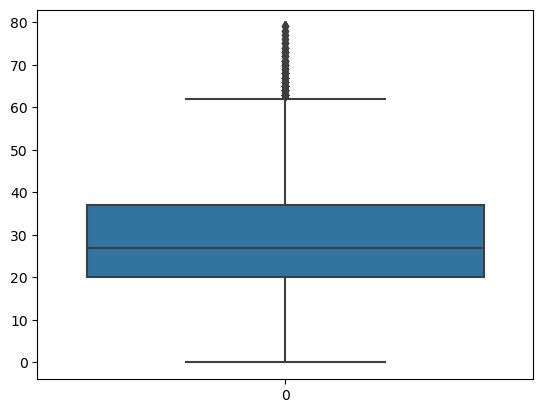

In [33]:
sns.boxplot(data=train_data['Age'])

In [34]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [35]:
train_data[['PassengerGroup','PassengerNum']] = train_data['PassengerId'].str.split('_', expand = True)
test_data[['PassengerGroup','PassengerNum']] = test_data['PassengerId'].str.split('_', expand = True)
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,HomePlanetCode,DestinationCode,CryoSleepCode,CabinDeck,CabinNum,CabinSide,CabinSideCode,VIPCode,PassengerGroup,PassengerNum
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0,2,1,G,3,S,1,0,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0,2,0,F,4,S,1,0,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,1,0,1,C,0,S,1,0,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,1,2,0,C,1,S,1,0,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0,2,0,F,5,S,1,0,0023,01


In [36]:
train_data[['PassengerGroup','PassengerNum']] = train_data[['PassengerGroup','PassengerNum']].apply(pd.to_numeric)
test_data[['PassengerGroup','PassengerNum']] = test_data[['PassengerGroup','PassengerNum']].apply(pd.to_numeric)

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8494 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8693 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8693 non-null   float64
 8   FoodCourt        8693 non-null   float64
 9   ShoppingMall     8693 non-null   float64
 10  Spa              8693 non-null   float64
 11  VRDeck           8693 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  HomePlanetCode   8693 non-null   int64  
 15  DestinationCode  8693 non-null   int64  
 16  CryoSleepCode    8693 non-null   int64  
 17  CabinDeck     

<AxesSubplot:xlabel='PassengerGroup'>

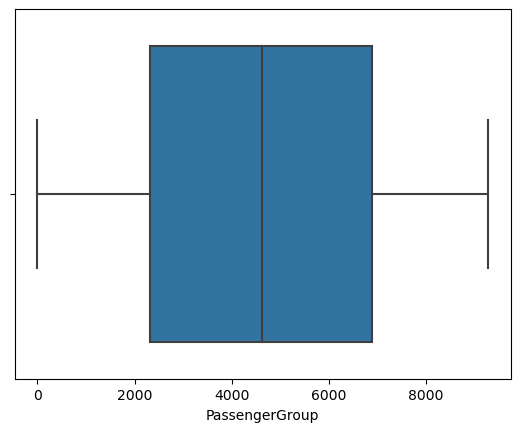

In [38]:
sns.boxplot(data=train_data, x='PassengerGroup')

<AxesSubplot:xlabel='PassengerGroup', ylabel='Count'>

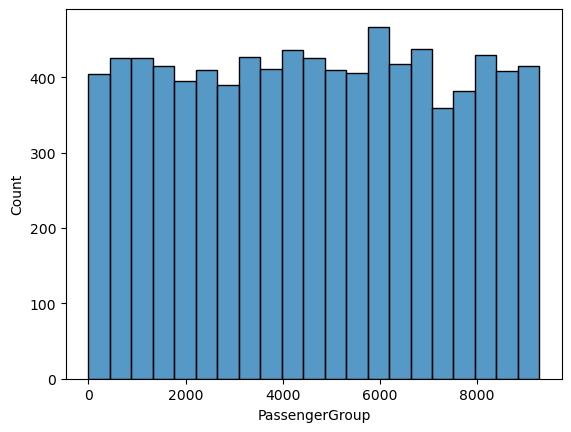

In [39]:
sns.histplot(data=train_data, x='PassengerGroup')

In [40]:
train_data.PassengerGroup.value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: PassengerGroup, Length: 6217, dtype: int64

**Defining the feature set**

In [41]:
features = ['HomePlanetCode','DestinationCode',
            'CryoSleepCode',
#             'CabinDeckCode',
            'CabinSideCode',
            'VIPCode',
            'Age',
#             'PassengerGroup',
#             'PassengerNum',
            'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'
           ]

X = pd.concat([train_data[features], train_CabinDeck_encoded], axis=1)
y = train_data['TransportedCode']

X_test = pd.concat([test_data[features], test_CabinDeck_encoded], axis=1)

In [42]:
X.head()

,HomePlanetCode,DestinationCode,CryoSleepCode,CabinSideCode,VIPCode,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,1,2,0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0
1,0,2,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,0,1,0,0
2,1,2,0,1,1,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,0,0,0,0
3,1,2,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,0,0,0
4,0,2,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,0,1,0,0


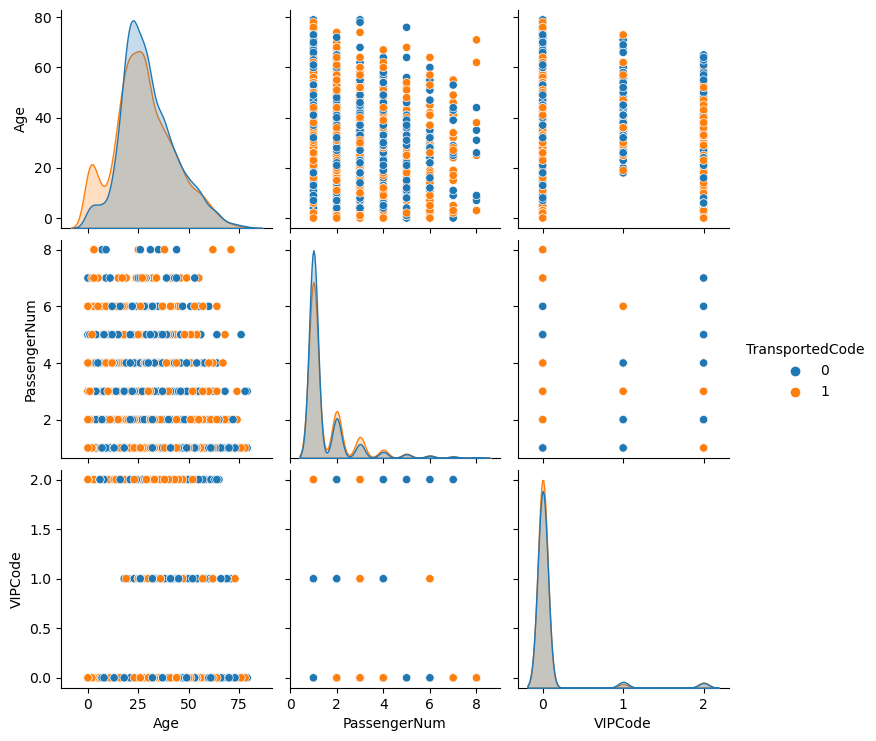

In [43]:
sns.pairplot(data=train_data[['Age','PassengerNum','VIPCode','TransportedCode']], hue='TransportedCode')

In [44]:
print(X.shape)
print(y.shape)

(8693, 19)
(8693,)


In [45]:
X.isna().sum()

HomePlanetCode     0
DestinationCode    0
CryoSleepCode      0
CabinSideCode      0
VIPCode            0
Age                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
CabinDeck_A        0
CabinDeck_B        0
CabinDeck_C        0
CabinDeck_D        0
CabinDeck_E        0
CabinDeck_F        0
CabinDeck_G        0
CabinDeck_T        0
dtype: int64

In [46]:
y.isna().sum()

0

In [47]:
y.value_counts()

1    4378
0    4315
Name: TransportedCode, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [49]:
X_train.columns

Index(['HomePlanetCode', 'DestinationCode', 'CryoSleepCode', 'CabinSideCode',
       'VIPCode', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D',
       'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T'],
      dtype='object')

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

X_train_scaled = pd.DataFrame(mm.fit_transform(X_train), columns = X_train.columns)
X_valid_scaled = pd.DataFrame(mm.transform(X_valid), columns = X_valid.columns)
# y_train_scaled = pd.DataFrame(ss.transform(y_train), columns = y_train.columns)
# y_valid_scaled = pd.DataFrame(ss.transform(y_valid), columns = y_valid.columns)

X_test_scaled = pd.DataFrame(mm.transform(X_test), columns = X_test.columns)

In [51]:
X_train_scaled

,HomePlanetCode,DestinationCode,CryoSleepCode,CabinSideCode,VIPCode,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0.000000,0.666667,0.0,1.0,0.0,0.354430,0.000000,0.001984,0.000000,0.035322,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.666667,0.0,0.0,0.0,0.215190,0.000000,0.043105,0.001320,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.333333,0.000000,0.5,0.5,0.0,0.354430,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.666667,0.0,0.0,0.0,0.253165,0.000000,0.000072,0.012302,0.052552,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.333333,0.000000,0.5,0.0,0.0,0.455696,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0.000000,0.666667,1.0,0.5,0.0,0.227848,0.000977,0.000072,0.006130,0.032845,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6950,0.666667,0.666667,0.0,0.5,1.0,0.632911,0.048161,0.000000,0.001277,0.041030,0.017735,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6951,0.000000,0.333333,0.0,0.0,0.0,0.278481,0.011028,0.000000,0.020262,0.000000,0.001077,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6952,0.666667,0.666667,0.0,0.0,0.0,0.430380,0.026454,0.000000,0.069215,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
X_test_scaled.isna().sum()

HomePlanetCode     0
DestinationCode    0
CryoSleepCode      0
CabinSideCode      0
VIPCode            0
Age                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
CabinDeck_A        0
CabinDeck_B        0
CabinDeck_C        0
CabinDeck_D        0
CabinDeck_E        0
CabinDeck_F        0
CabinDeck_G        0
CabinDeck_T        0
dtype: int64

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train_scaled, y_train)

pred_rf_train = model_rf.predict(X_train_scaled)
pred_rf_valid = model_rf.predict(X_valid_scaled)

print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_train, y_train))
print("R2 Score %.4f" % model_rf.score(X_train_scaled, y_train))

print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_valid, y_valid))
print("R2 Score %.4f" % model_rf.score(X_valid_scaled, y_valid))

MAE: 0.0453
R2 Score 0.9547
MAE: 0.2179
R2 Score 0.7821


In [54]:
print(metrics.classification_report(y_train, pred_rf_train))
print(metrics.classification_report(y_valid, pred_rf_valid))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3454
           1       0.94      0.98      0.96      3500

    accuracy                           0.95      6954
   macro avg       0.96      0.95      0.95      6954
weighted avg       0.96      0.95      0.95      6954

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       861
           1       0.79      0.77      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [55]:
# X_scaled = pd.DataFrame(mm.fit_transform(X), columns = X.columns)
# X_scaled

In [56]:
# X_scaled.isna().sum()

**XG Boost**

In [57]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train_scaled, y_train)
pred_xgb_train = xgb_classifier.predict(X_train_scaled)
pred_xgb_valid = xgb_classifier.predict(X_valid_scaled)

print("MAE: %.4f" % metrics.mean_absolute_error(pred_xgb_train, y_train))
print("R2 Score %.4f" % xgb_classifier.score(X_train_scaled, y_train))

print("MAE: %.4f" % metrics.mean_absolute_error(pred_xgb_valid, y_valid))
print("R2 Score %.4f" % xgb_classifier.score(X_valid_scaled, y_valid))

MAE: 0.0979
R2 Score 0.9021
MAE: 0.2099
R2 Score 0.7901


Trying with Pipeline and Cross Validation

In [58]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', RandomForestClassifier(n_estimators=50, random_state=42))
#                              ])

# from sklearn.model_selection import cross_val_score
# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

In [59]:
# model_rf.fit(X_scaled,y) 
predictions = xgb_classifier.predict(X_test_scaled)
predictions.astype(bool)

array([ True, False,  True, ...,  True,  True,  True])

In [60]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index = False)
print("Submission saved!")

Submission saved!
